# DSCI GROUP PROJECT: (title)

## Introduction

The Department of Computer Science at UBC is researching player behavior on a Minecraft server they created. 
To maximize their user recruitment effort, they are interested in which player characteristics are most predictive of subscribing to a game-related newsletter. The data set collected includes player characteristics such as age, experience, hours played, and gender. This project will utilise K-nearest neighbours classification to predict whether a player will subscribe based on their age and the hours they spend playing. The K-nearest neighbours classifier predicts the label of a new observation by finding the K most similar observations to the new observation and using the majority class of the K most similar observations to predict the new class. K is representative of the number of nearest neighbours that will be used and is determined using cross-validation. 


## Question
**Broad Question**: “What player characteristics and behaviours are most predictive of 
subscribing to a game-related newsletter, and how do these features differ between various player types?”\
**Specific Question**:Can age and hours played predict whether a player will subscribe to a game-related newsletter?




`subscribe`: It has TRUE/FALSE statements. TRUE for those who subscribe the news settler:FALSE for those who do NOT subscribe the news letter.

In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### players.csv

In [4]:
# load players.csv
players <- read_csv("https://raw.githubusercontent.com/svipond2/projectplanningindividual/refs/heads/main/players%20(2).csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

In [5]:
# Selecting only the variables that we are interested in.
players_select <- players|>
    select(subscribe, played_hours, Age)
head(players_select)

subscribe played_hours Age
1  TRUE     30.3          9 
2  TRUE      3.8         17 
3 FALSE      0.0         17 
4  TRUE      0.7         21 
5  TRUE      0.1         21 
6  TRUE      0.0         17

## Mean Value Calculation

In [6]:
players_mean <- players |>
                select(played_hours, Age) |>
                map_df(mean, na.rm=TRUE)
players_mean

played_hours Age     
1 5.845918     20.52062

**Justification that using players.csv is suitable to answer the specific question.**
### sessions.csv

In [7]:
# load players.csv
# session <- read_csv("")
# head(sessions)

## Exploratory Data Analysis and Visualization

Age
1  9 
2 17 
3 17 
4 21 
5 21 
6 17

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


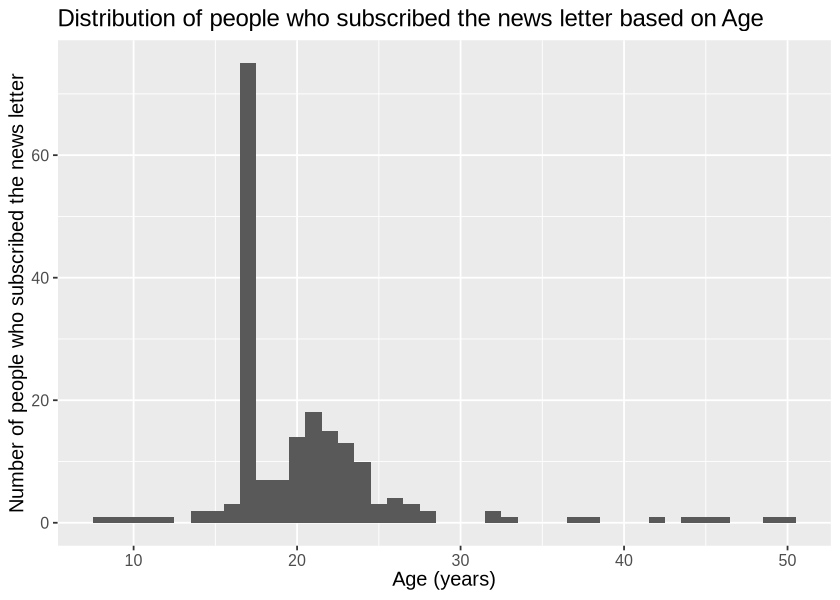

In [8]:
#Before making graphs with colours, we want to start from very basic graph to see if there is any trend.

#First, we want to see if the relationship between age and subscribe.
options(repr.plot.width= 7, repr.plot.height= 5)

subscribed_age <- players |>
                    filter(subscribe= TRUE) |>
                    select(Age)

subscirbe_age_plot <- ggplot(subscribed_age, aes(x=Age)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Age (years)", y= "Number of people who subscribed the news letter", 
                             title= "Distribution of people who subscribed the news letter based on Age") +
                        theme(text=element_text(size=12))

head(subscribed_age)
subscirbe_age_plot

Warning message in geom_histogram(stat = "count", position = "dodge", bins = 30):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


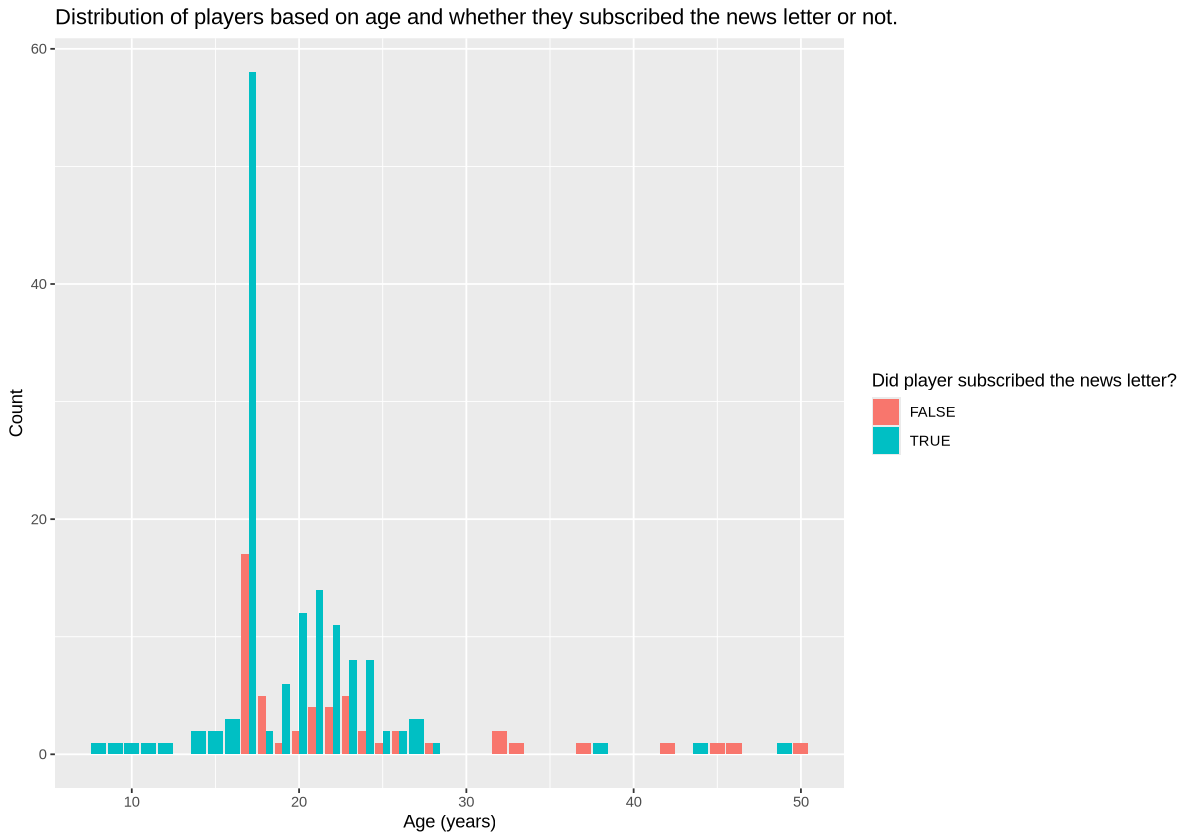

In [9]:
# I am asking about the error message on piazza rn.

options(repr.plot.width=10, repr.plot.height=7)

subscribe_age_colour_plot <- ggplot(players_select, aes(x= Age, fill= subscribe)) +
                        geom_histogram(stat="count", position= "dodge", bins=30) +
                        labs(x="Age (years)", y= "Count", 
                             title= "Distribution of players based on age and whether they subscribed the news letter or not.",
                             fill="Did player subscribed the news letter?")
                        theme(text=element_text(size=12))

subscribe_age_colour_plot

played_hours
1 30.3        
2  3.8        
3  0.0        
4  0.7        
5  0.1        
6  0.0

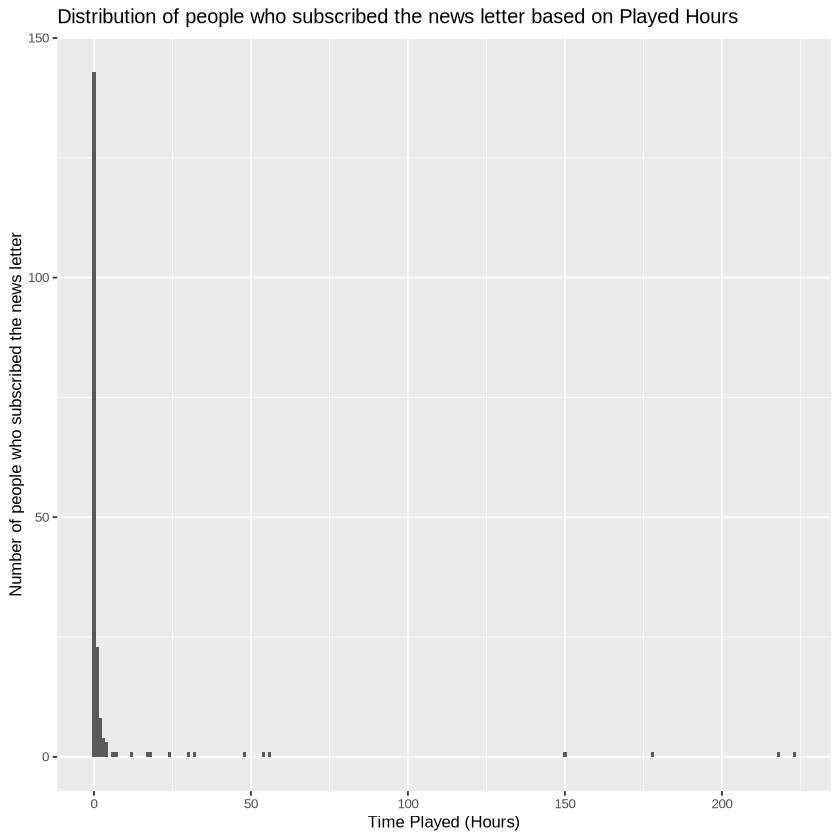

In [10]:
# Second, I want to see if the relationship between played_hours and subscribe.
options(repr.plot.width=7, repr.plot.height=7)

subscribed_hours <- players |>
                    filter(subscribe= TRUE) |>
                    select(played_hours)

subscirbe_hours_plot <- ggplot(subscribed_hours, aes(x=played_hours)) +
                        geom_histogram(binwidth=1) +
                        labs(x="Time Played (Hours)", y= "Number of people who subscribed the news letter", 
                             title= "Distribution of people who subscribed the news letter based on Played Hours") +
                        theme(text=element_text(size=10))

head(subscribed_hours)
subscirbe_hours_plot

Warning message in geom_histogram(stat = "count", position = "dodge", bins = 30, :
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message:
“Removed 85 rows containing non-finite outside the scale range (`stat_count()`).”


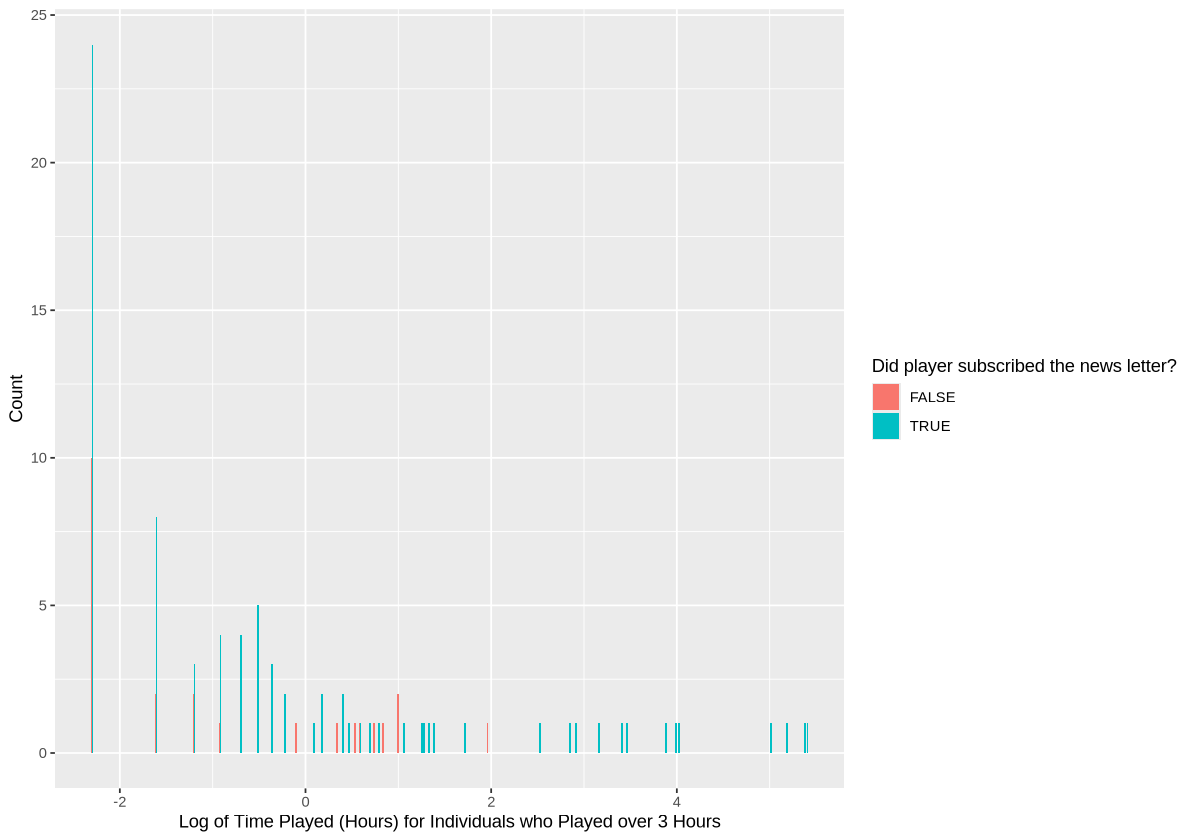

In [11]:
options(repr.plot.width=10, repr.plot.height=7)

played_hours_large_plot <- players|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=played_hours_log, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", bins=30, binwidth=10)+
                        labs(x="Log of Time Played (Hours) for Individuals who Played over 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?")
played_hours_large_plot

subscribe played_hours Age
1 FALSE     0.0          17 
2  TRUE     0.7          21 
3  TRUE     0.1          21 
4  TRUE     0.0          17 
5  TRUE     0.0          19 
6 FALSE     0.0          21

subscribe played_hours Age
1 TRUE       30.3         9 
2 TRUE        3.8        17 
3 TRUE       48.4        17 
4 TRUE        5.6        17 
5 TRUE       12.5        27 
6 TRUE      218.1        20

Warning message in geom_histogram(stat = "count", position = "dodge", binwidth = 10):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(stat = "count", position = "dodge", binwidth = 10):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


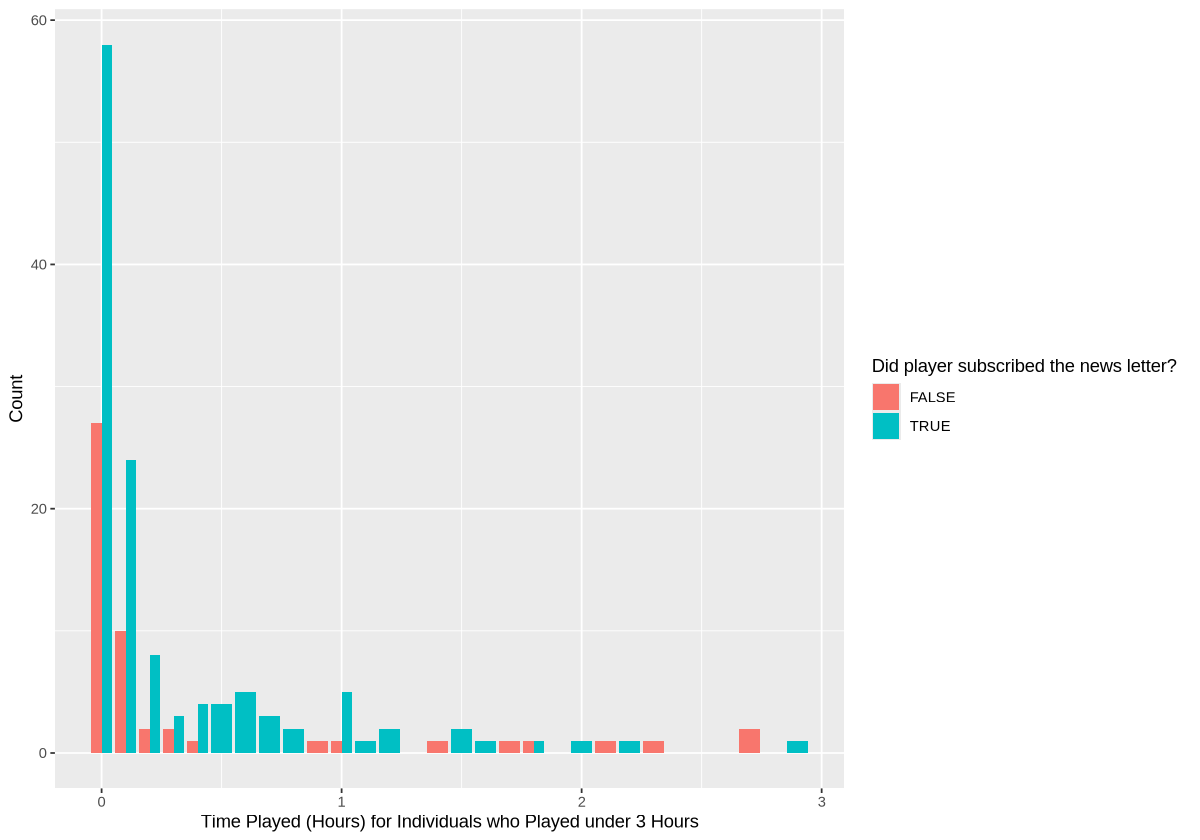

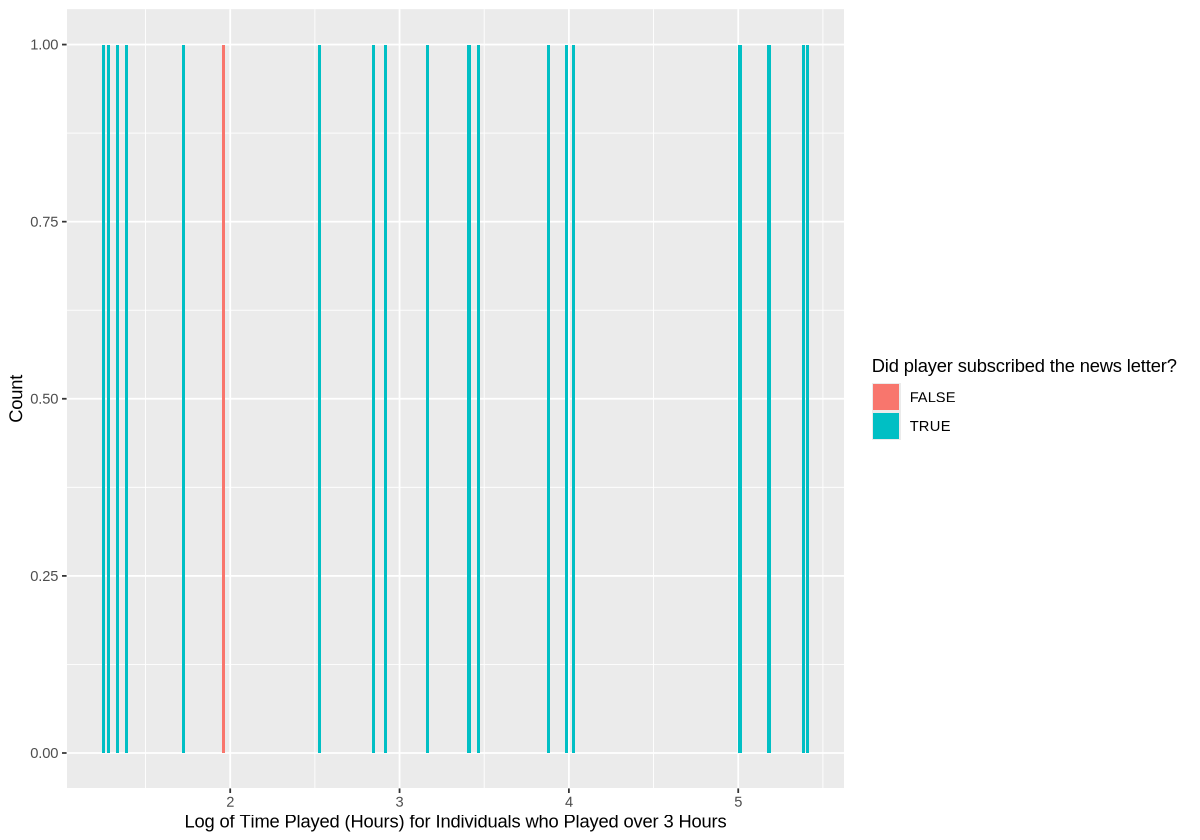

In [12]:
options(repr.plot.width=10, repr.plot.height=7)

players_separate_1 <- players_select |>
                        filter(played_hours <= 3)
players_separate_2 <- players_select |>
                        filter(played_hours >=3)

head(players_separate_1)
head(players_separate_2)

played_hours_small_plot <- players_separate_1|>
                        ggplot(aes(x=played_hours, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", binwidth=10)+
                        labs(x="Time Played (Hours) for Individuals who Played under 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?")
played_hours_small_plot

played_hours_large_plot <- players_separate_2|>
                        mutate(played_hours_log = log(played_hours))|>
                        ggplot(aes(x=played_hours_log, fill=subscribe))+
                        geom_histogram( stat="count", position= "dodge", binwidth=10)+
                        labs(x="Log of Time Played (Hours) for Individuals who Played over 3 Hours",
                             y="Count",
                             fill="Did player subscribed the news letter?")
played_hours_large_plot

We can see that if someone has played over 3 hours, they are very likely to have subscribed to the newsletter. However, if they have played under 3 hours, the time played is not enough to predict whether someone has subscribed to the newsletter or not. For this, we will have to use age to predict. 

From this analysis, we can see that if someone is under the age of 30 and played under 3 hours they are more likely to subscribe. 

*Are we doing classification analysis still?*

In [13]:
players_fct <- players_select |>
    mutate(subscribe = as_factor(subscribe))|>
    filter(Age!="NA")

In [14]:
set.seed(1234)
players_split <- initial_split(players_fct, prop=0.75, strata=subscribe)
training_set <- training(players_split)
testing_set <- testing(players_split)

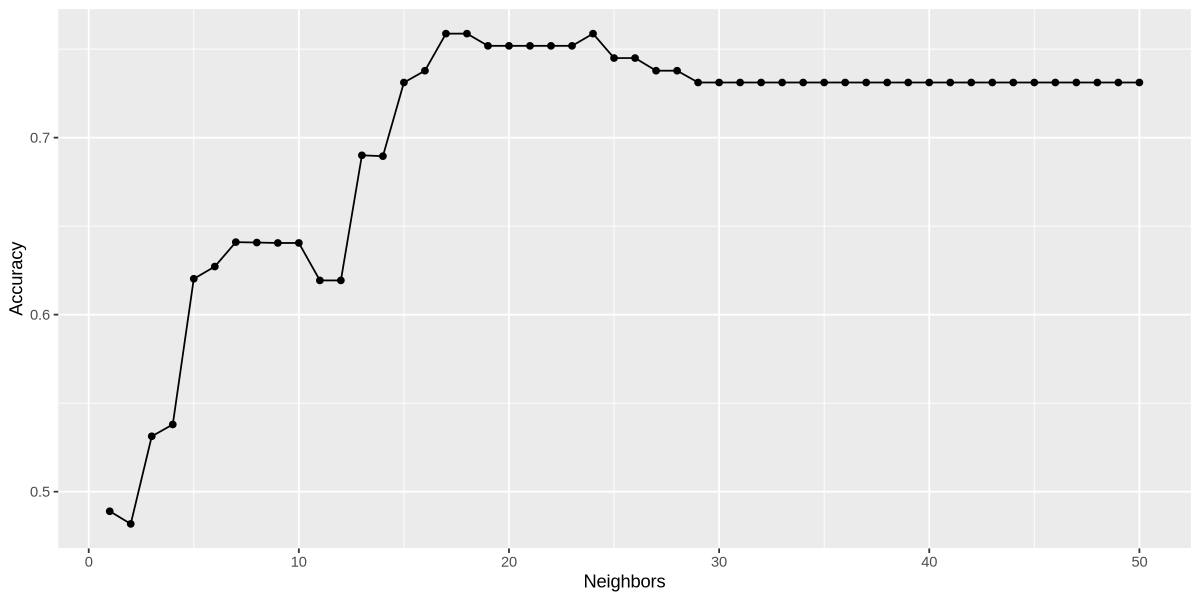

In [15]:
#knn classification using age and played_hours


options(repr.plot.height = 5, repr.plot.width = 10)
knn_recipe<-recipe(subscribe~ Age + played_hours, data=training_set)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_mode("classification")|>
    set_engine("kknn")

cross_vfold <- vfold_cv(training_set, v=5, strata=subscribe)

cross_k <- tibble(neighbors = seq(from=1, to=50, by=1))

knn_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(knn_spec)|>
    tune_grid(resamples=cross_vfold, grid=cross_k)|>
    collect_metrics()

accuracies <- knn_fit|>
                filter(.metric=="accuracy")

cross_val_plot <- ggplot(accuracies, aes(x=neighbors, y=mean))+
                  geom_point()+
                  geom_line()+
                  labs(x="Neighbors", y="Accuracy")

cross_val_plot

From this analyis, we can determine that we should use k=5 to determine whether someone is subscribed or not.\
\
Isn't is easier to justify 8?\
I did run the precision/recall calculation and k values of 8 or 9 gave me quite good number.\
(k=5 for 60% and k= 8 for 75% precision where recall did not change much.)

In [16]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=5)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)

pred_subscribe subscribe played_hours Age
1 TRUE           TRUE      30.3          9 
2 TRUE           FALSE      0.0         17 
3 TRUE           TRUE       0.1         21 
4 TRUE           TRUE       0.0         17 
5 FALSE          TRUE       0.2         22 
6 TRUE           TRUE       0.0         17

In [17]:
set.seed(9999) 
players_metrics <- players_predictions|>
    metrics(truth=subscribe, estimate=pred_subscribe)|>
    filter(.metric=="accuracy")

players_conf_mat <- players_predictions|>
    conf_mat(truth=subscribe, estimate=pred_subscribe)

players_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE     6    4
     TRUE      7   32

In [18]:
are_grid <- seq(min(players_fct$played_hours),
                max(players_fct$played_hours),
                length.out = 100)
smo_grid <- seq(min(players_fct$Age),
                max(players_fct$Age),
                length.out = 100)
asgrid <- as_tibble(expand.grid(played_hours = are_grid,
                                Age = smo_grid))

knnPredGrid <- predict(players_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

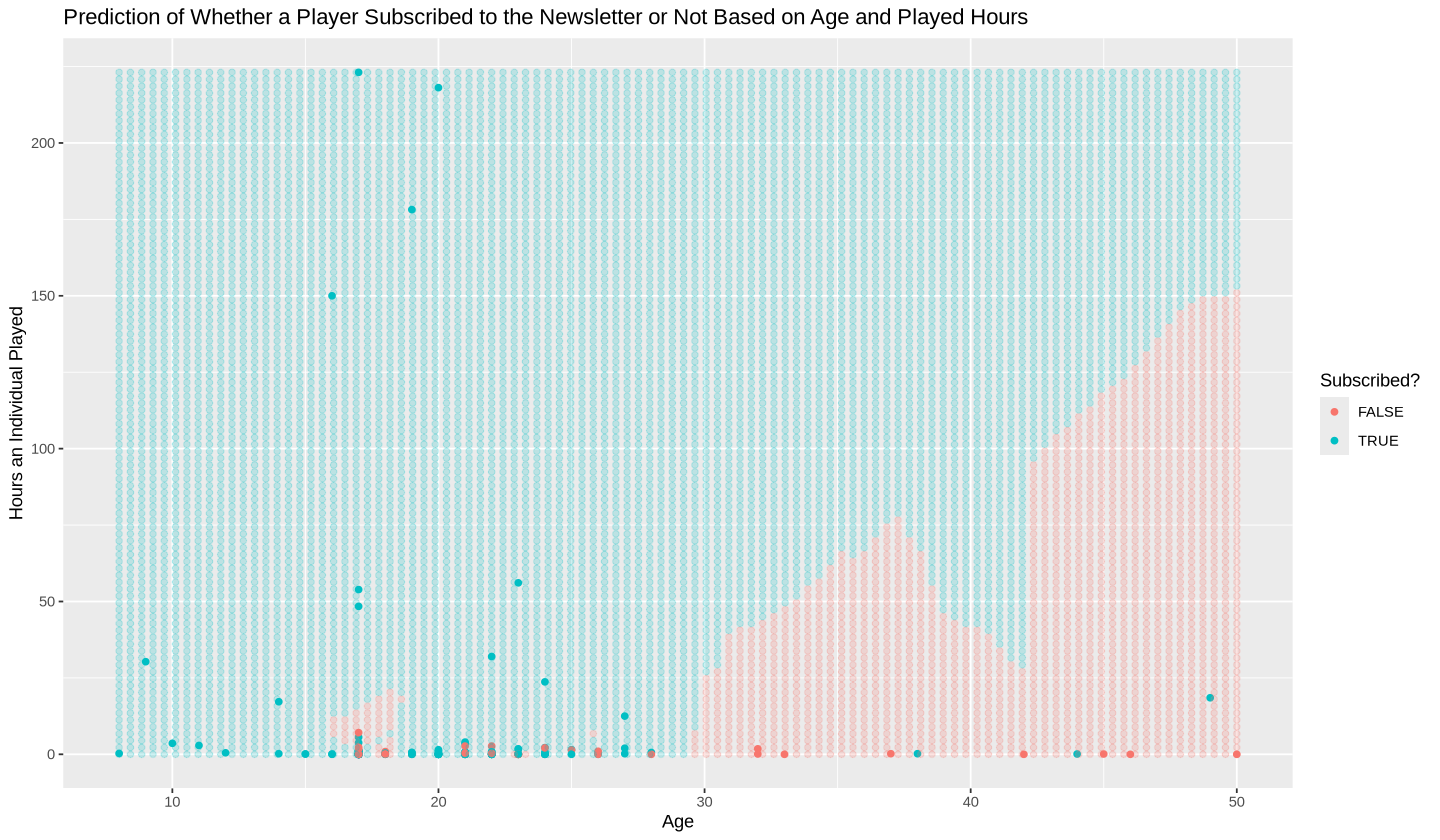

In [19]:
options(repr.plot.width=12, repr.plot.height=7)
prediction_plot <- ggplot()+
                geom_point(players_fct, mapping=aes(x = Age,
                           y =played_hours,
                           color = subscribe), alpha = 1) +
                geom_point(prediction_table, mapping=aes(x = Age,
                           y =played_hours,
                           color = subscribe), alpha = 0.2)+
                labs(x="Age", y="Hours an Individual Played", title="Prediction of Whether a Player Subscribed to the Newsletter or Not Based on Age and Played Hours", colour="Subscribed?")
prediction_plot

In [20]:
#Check precision and recall on testing set

data_test_predictions <- predict(players_fit, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions <- data_test_predictions|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall <- data_test_predictions|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions 
data_test_recall

.metric   .estimator .estimate
1 precision binary     0.6

.metric .estimator .estimate
1 recall  binary     0.4615385

### classification with k=8

In [21]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=8)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit <- workflow()|>
    add_recipe(knn_recipe)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)


data_test_predictions <- predict(players_fit, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions <- data_test_predictions|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall <- data_test_predictions|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions 
data_test_recall

pred_subscribe subscribe played_hours Age
1 TRUE           TRUE      30.3          9 
2 TRUE           FALSE      0.0         17 
3 TRUE           TRUE       0.1         21 
4 TRUE           TRUE       0.0         17 
5 TRUE           TRUE       0.2         22 
6 TRUE           TRUE       0.0         17

.metric   .estimator .estimate
1 precision binary     0.75

.metric .estimator .estimate
1 recall  binary     0.4615385

In [ ]:
are_grid <- seq(min(players_fct$played_hours),
                max(players_fct$played_hours),
                length.out = 100)
smo_grid <- seq(min(players_fct$Age),
                max(players_fct$Age),
                length.out = 100)
asgrid <- as_tibble(expand.grid(played_hours = are_grid,
                                Age = smo_grid))

knnPredGrid <- predict(players_fit, asgrid)

prediction_table <- bind_cols(knnPredGrid, asgrid) |>
  rename(subscribe = .pred_class)

### Classificaiton wiht a single predictor (Age)

In [30]:
options(repr.plot.height = 5, repr.plot.width = 10)

knn_recipe2<-recipe(subscribe~ Age, data=training_set)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

knn_fit <- workflow()|>
    add_recipe(knn_recipe2)|>
    add_model(knn_spec)|>
    tune_grid(resamples=cross_vfold, grid=cross_k)|>
    collect_metrics()

accuracies2 <- knn_fit2|>
                filter(.metric=="accuracy")

cross_val_plot2 <- ggplot(accuracies2, aes(x=neighbors, y=mean))+
                  geom_point()+
                  geom_line()+
                  labs(x="Neighbors", y="Accuracy")

cross_val_plot2

ERROR: Error in eval(expr, envir, enclos): object 'knn_fit2' not found


In [ ]:
players_spec <- nearest_neighbor(weight_func="rectangular", neighbors=7)|>
    set_engine("kknn")|>
    set_mode("classification") 

players_fit2 <- workflow()|>
    add_recipe(knn_recipe2)|>
    add_model(players_spec)|>
    fit(data=players_fct)

players_predictions <- predict(players_fit, testing_set)|>
    bind_cols(testing_set)|>
    rename(pred_subscribe = .pred_class)

head(players_predictions)

In [ ]:
data_test_predictions2 <- predict(players_fit2, testing_set) |>
                         bind_cols(testing_set)

data_test_precisions2 <- data_test_predictions2|>
                        precision(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_recall2 <- data_test_predictions2|>
                        recall(truth= subscribe, estimate= .pred_class, event_level="first")

data_test_precisions2
data_test_recall2

From this, we found that single variable predictor (i.e. removing the played hours from predictors) did not improve the precision or recall of the classification.